# Titanic - Machine Learning from Disaster


In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
%cd '/content/drive/MyDrive/Colab Notebooks/Introduction to Python'
!ls

/content/drive/MyDrive/Colab Notebooks/Introduction to Python
gender_submission.csv  test.csv  Titanic-Kaggle.ipynb  train.csv


In [197]:
#IMPORT LIBRARY

# data analysis and wrangling
import numpy as np
from numpy import arange
import pandas as pd
from pandas import read_csv
from pandas import set_option

# visualization
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import SVC, LinearSVC

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


In [198]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [199]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [200]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Variable Description**
1. PassengerId : unique id number to each passenger
2. Survived : passenger survive(1) or died(0)
3. Pclass : passenger class
4. Name : name
5. Sex : gender of passenger
6. Age : age of passenger
7. SibSp : number of siblings/spouses
8. Parch : number of parents/children
9. Ticket : ticket number
10. Fare : amount of money spend on ticket
11. Cabin : cabin category
12. Embarked : port where passenger embark (C = Cherbourg, Q = Queenstown, S = Southhampton)

In [201]:
# preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerID**
The first column is the passenger ID. The ID for a passenger is just a number to identify this passenger in this dataset. So this column is not really a part of the information we should care about. We can drop this column or make it the index for this dataset. Let's make it the for the dataset just to demonstrate the use of df.set_index method.

In [202]:
train_df.set_index(train_df.PassengerId, inplace=True)
train_df.drop('PassengerId', axis = 1, inplace=True)

In [203]:
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
test_df = pd.read_csv('test.csv', index_col="PassengerId")
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [205]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [206]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [207]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [208]:
converted_features = ["Pclass", "Sex", "Embarked", "SibSp", "Parch"]
def convert_cat(df, features):
    for feature in converted_features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, converted_features)
convert_cat(test_df, converted_features)

In [209]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [210]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


In [211]:
#missing value in training dataset
print("Count of the missing values in train")
print(30 * "-")
print(train_df.isna().sum())
print(30 * "-")

#missing value in test dataset
print("Count of the missing values in test")
print(30 * "-")
print(test_df.isna().sum())
print(30 * "-")

Count of the missing values in train
------------------------------
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
------------------------------
Count of the missing values in test
------------------------------
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64
------------------------------


**Distribuiton of Numerical features**

In [212]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


**Distribution of Categorical features**

In [213]:
train_df.describe(include=['O'])

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Braund, Mr. Owen Harris",347082,B96 B98
freq,1,7,4


In [214]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# Exploratory Data Analysis (EDA)
**Correlating categorical features**


*   Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`, `SibSp`, `Parch`


**Target Variable: `Survived`**

In [215]:
print(train_df['Survived'].value_counts().to_frame())
print(30*'-')
print(train_df['Survived'].value_counts(normalize=True).to_frame())

   Survived
0       549
1       342
------------------------------
   Survived
0  0.616162
1  0.383838


Only 38% survived from the disaster. So the training data suffers from data imbalance but ut is not severe which is why I will not consider techniques like sampling to tackle the imbalance.

**Target Variable: `Sex`**

In [216]:
print(train_df['Sex'].value_counts().to_frame())
print(30*'-')
print(train_df['Sex'].value_counts(normalize=True).to_frame())
print(30*'-')
print(train_df.groupby(['Sex','Survived'])['Survived'].count())

        Sex
male    577
female  314
------------------------------
             Sex
male    0.647587
female  0.352413
------------------------------
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

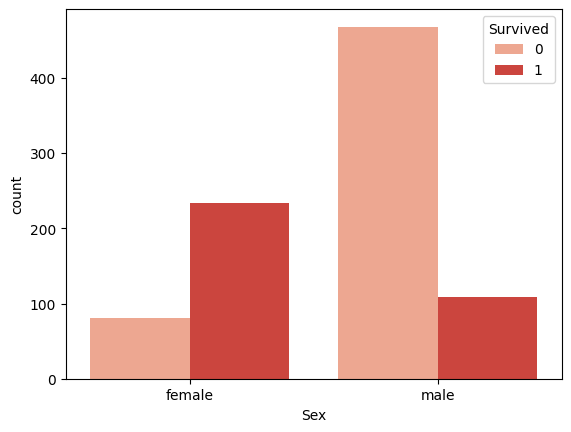

In [217]:
sns.countplot(data=train_df, x='Sex', hue='Survived', palette="Reds")

The plot confirms that one old code of conduct that sailors and captains follow in case of threatening situations: **"Women and children first !"**.

* Remaining Categorical Feature Columns

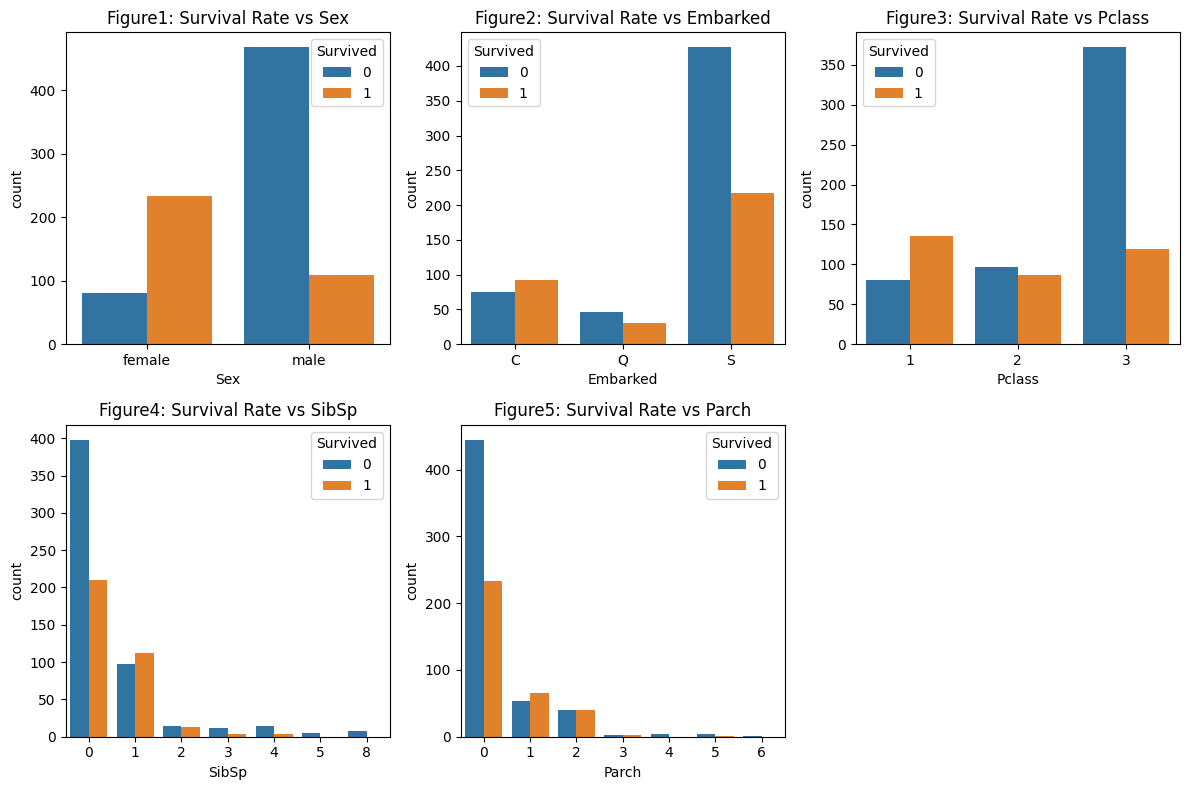

In [218]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c      #index to loop through list 'cols"
    if i < len(cols):
      ax_i = ax[r,c]
      sns.countplot(data=train_df, x=cols[i], hue='Survived', ax=ax_i)
      ax_i.set_title(f"Figure{i+1}: Survival Rate vs {cols[i]}")
ax.flat[-1].set_visible(False) #remove the last subplot
plt.tight_layout()
plt.show()

**Observation:**
* Survival Rate:
> * Fig 1: Female survival rate > male
> * Fig 2: Most peole embarked on Southampton were less likely to survived
> * Fig 3: 1st class passenger have higher survival rate
> * Fig 4: People going without siblings or spouses were mostly not survived, the number of passenger with 1 family member had a better chance to survive.
> * Fig 5: Almost people having no children were not survived.





# EDA for the numerical features
**Numerical Features**: `Age`, `Fare`

**Age**

<Axes: xlabel='Age', ylabel='Count'>

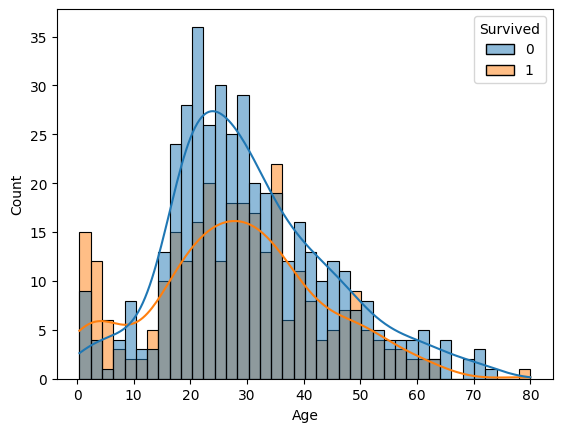

In [219]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins = 40, kde=True)

* Majority passengers were from 18-40 ages
* Large number of age groups 16-24 were not survived
* Children had more chance to survive than other ages
* Oldest passengers (Age = 80) survived



**Fare**

In [220]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

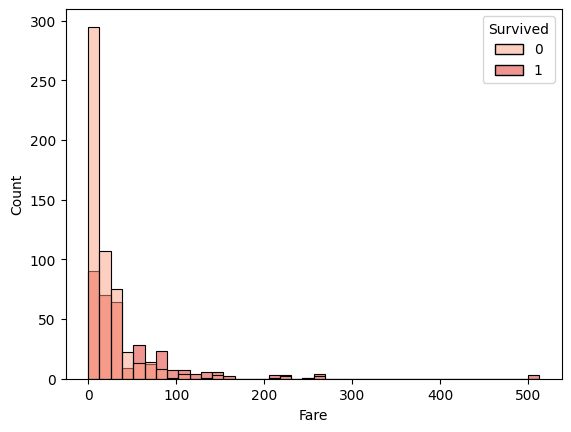

In [221]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins = 40, palette="Reds")

In [222]:
pd.qcut(train_df["Fare"], 4)

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
            ...       
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] <
                                           (31.0, 512.329]]

<Axes: xlabel='Fare', ylabel='count'>

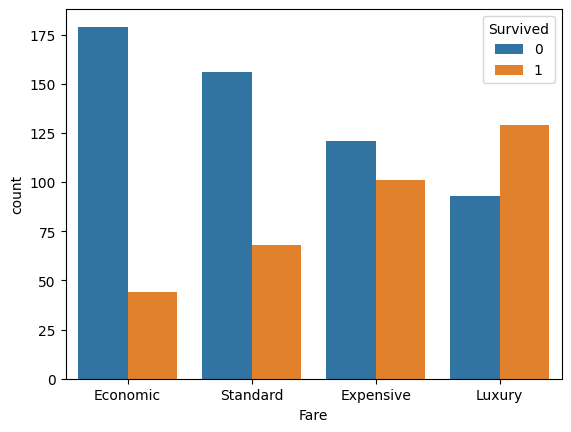

In [223]:
#To name for 0-25% quartile, 25-50, 50-75, 75-100
fare_categories = ['Economic', 'Standard', "Expensive", 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)
sns.countplot(x=quartile_data, hue=train_df['Survived'])

# Feature Engineering & Wrangling Data

## Feature Engineering

**Titel**

In [224]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine_df = [train_df, test_df]

In [225]:
for dataset in combine_df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])
# train_df['Title'].value_counts()

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [226]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [227]:
def group_title(title):
  if title in ['Mr', 'Mrs', 'Miss', 'Master']:
    return title
  elif title in ['Mlle','Mme','Ms','Lady']:
    return "Miss"
  elif title in ['Dr','Major','Capt','Sir','Don']:
    return "Mr"
  elif title in ['Countess','Dona']:
    return "Mrs"
  else:
    return "Others"

In [228]:
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [229]:
# train_df['Title'].replace(['Mlle','Mme','Ms','Lady'], 'Miss', inplace=True)
# train_df['Title'].replace(['Dr','Major','Capt','Sir','Don'], 'Mr', inplace=True)
# train_df['Title'].replace(['Countess','Dona'], 'Mrs', inplace=True)
# train_df['Title'].replace(['Jonkheer','Col','Rev'], 'Others', inplace=True)

In [230]:
train_df['Title'].value_counts()

Mr        529
Miss      187
Mrs       126
Master     40
Others      9
Name: Title, dtype: int64

In [231]:
test_df['Title'].value_counts()

Mr        241
Miss       79
Mrs        73
Master     21
Others      4
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

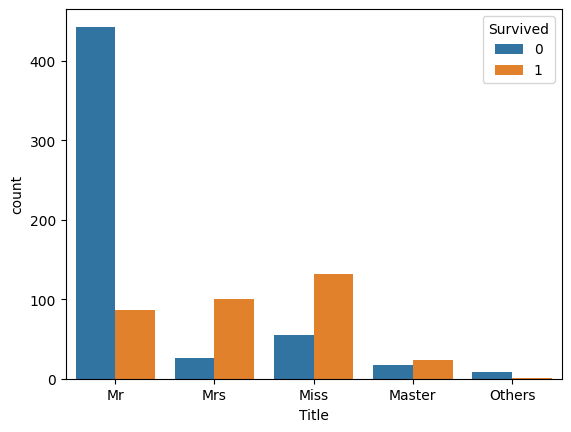

In [232]:
sns.countplot(data=train_df, x= 'Title', hue='Survived')

In [233]:
train_df.Title.isnull().any()

False

**Family Size**
* `SibSp`, `Parch`

In [234]:
for dataset in combine_df:
    dataset['Family_Size'] = dataset['SibSp'].astype('int') + dataset['Parch'].astype('int') + 1
    dataset['Family_Cat'] = pd.cut(dataset['Family_Size'], bins=[0, 1, 4, 6, 20], labels=['Alone', 'Small', 'Medium', 'Large'])


In [235]:
train_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,Alone


In [236]:
test_df.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr,1,Alone
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs,2,Small
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr,1,Alone


<Axes: xlabel='Family_Cat', ylabel='count'>

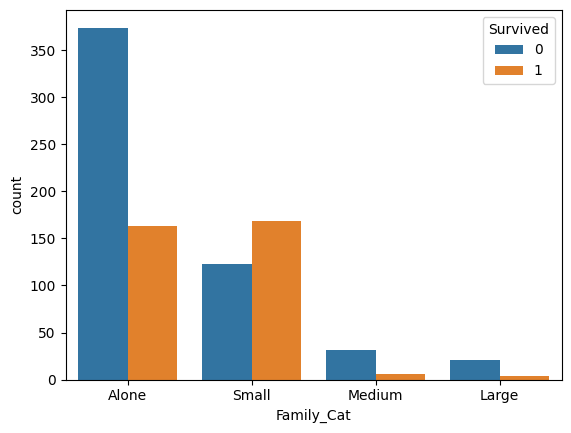

In [237]:
sns.countplot (data = train_df, x = 'Family_Cat', hue = 'Survived')

## Data Wrangling


In [238]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [239]:
def display_missing(df, feature_cols):
  n_rows = df.shape[0]
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
      print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")

display_missing(train_df,feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.


In [240]:
display_missing(test_df,feature_cols)

Age has 20.57% missing values.
Fare has 0.24% missing values.


### Filling missing values
**Age**
* Filling missing values with `median` of whole dataset

In [241]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']

<ipython-input-241-3fa291a8b2d3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']


In [242]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [243]:
# Filling the missing values in Age with the medians of Sex and Pclass groups

train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

<ipython-input-243-c5686d1f50d6>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
<ipython-input-243-c5686d1f50d6>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_df['Age'] = test_df.groupby(

In [244]:
display_missing(test_df,feature_cols)
display_missing(train_df,feature_cols)

Fare has 0.24% missing values.
Embarked has 0.22% missing values.


# Model Training

In [245]:
X = train_df[feature_cols]
y = train_df['Survived']

In [246]:
X_test = test_df[feature_cols]

In [247]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [248]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [249]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [250]:
X = preprocessor.transform(X) # X -> X_train, X_val

In [251]:
X_test = preprocessor.transform(X_test)

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [254]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [255]:
y_train.shape, y_val.shape

((712,), (179,))

In [256]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures

#sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

## Logistic Regression

In [257]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [258]:
log_reg.score(X_val, y_val)

0.8268156424581006

In [259]:
y_pred = log_reg.predict(X_val)

In [260]:
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.83      0.70      0.76        70

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



## Polynomial Features

In [261]:
poly = PolynomialFeatures(degree=5)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [262]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [263]:
poly_log_reg.score(poly_features_X_val, y_val)


0.7821229050279329

## Decision Tree

In [264]:
decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth = 5, random_state = 2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [265]:
decision_tree.score(X_val, y_val)

0.8379888268156425

## Cross-validation (K - Fold)

In [266]:
from sklearn.model_selection import cross_val_score

In [267]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state=2022)

In [268]:
lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)
lr_scores.mean(), lr_scores.std()

(0.8293955181721172, 0.024574992264481045)

In [269]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)
dt_scores.mean(), dt_scores.std()

(0.8092021844203126, 0.010058804195633006)

## Baseline Model Comparison

In [270]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier #!pip install xgboost

seed = 2023
models = [
    LinearSVC(max_iter = 12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]


In [271]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    # define k-fold:
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
      sns.boxplot(x='model_name', y='accuracy_score', data = cv_df, color ='lightpink', showmeans=True)
      plt.title("Boxplot of Baseline model accuracy using 5-fold cross-validation")
      plt.xticks(rotation=45)
      plt.show()

    # Summary result:
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis =1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']

    # Sort by accuracy:
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)

    return baseline_results

generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)


,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.828291,0.031118
LinearSVC,0.826044,0.037442
XGBClassifier,0.815894,0.022611
AdaBoostClassifier,0.813684,0.031185
KNeighborsClassifier,0.812554,0.010531
RandomForestClassifier,0.810269,0.029896
ExtraTreesClassifier,0.801312,0.022301
DecisionTreeClassifier,0.784489,0.016985


In [274]:
y = train_df['Survived']

# Making predictions
model = SVC(random_state=seed)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Preparing the submission file
submission_df = pd.DataFrame({'PassengerId': test_df.index,'Survived': predictions})

# Export to CSV
submission_filename = '/content/drive/MyDrive/Colab Notebooks/Introduction to Python/titanic_submission.csv'
submission_df.to_csv(submission_filename, index=False)